passing f =  -3.0
passing f =  -2.0
passing f =  -1.0


/tmp/ipykernel_505/3938989118.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  omega=omega_cyclotron/f
/tmp/ipykernel_505/3938989118.py:58: RuntimeWarning: invalid value encountered in cos
  ex_wave = np.cos(kz*z_domain-t*omega)
/tmp/ipykernel_505/3938989118.py:59: RuntimeWarning: invalid value encountered in sin
  ey_wave = np.sin(kz*z_domain-t*omega)
/tmp/ipykernel_505/3938989118.py:65: RuntimeWarning: invalid value encountered in cos
  del_ex=A*np.cos(kz*x_vect[2]-t*omega)
/tmp/ipykernel_505/3938989118.py:66: RuntimeWarning: invalid value encountered in sin
  del_ey=A*np.sin(kz*x_vect[2]-t*omega)


passing f =  0.0
passing f =  1.0
passing f =  2.0
passing f =  3.0
done


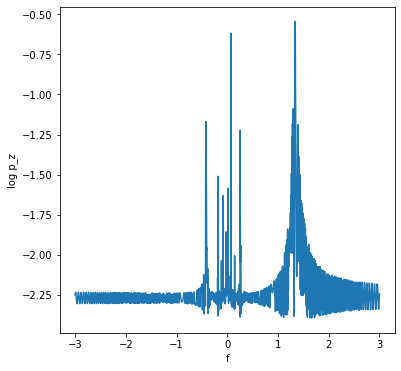

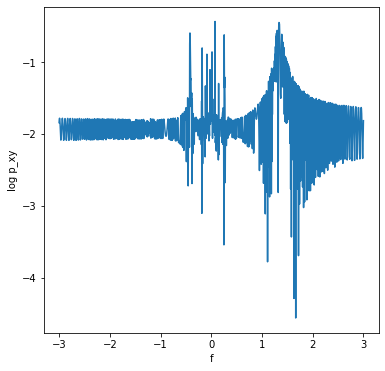

In [251]:
import numpy as np
from matplotlib import pylab as plt

#initialise inputs and constants
#see 2.1.1 of https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

    #helping method for magnitude
def mag(x): 
    return np.sqrt(sum(i**2 for i in x))

def pusher_varying_f(f):    #initial conditions
    c=1 #to keep courant stable
    time_total = 1000 #arbitrary total time that will be evenly split up
    del_t_count = 500 #set number of timesteps so implicitly set delta t
    q=1
    m=1
    v_vect = np.array([0.1*c,0.1*c,0.1*c]) #velocity without any relativistic considerations, initial condition
    b_vect = np.array([0,0,1]) #for use when there is no wave passing through, i.e. constant b field
    b_guide = np.array([0,0,1])#only z field for now, this is the guide field at all points in the domain
    e_naught = np.array([0,0,0])#initial electric field, never changes
    e_vect = np.array([0,0,0])#initialize mutable electric field vector
    x_vect = np.array([0,0,0])
    #wave initial conditions
    omega = .05
    Amax = .05 #if amplitude is too high, we end up with  faster than c velocity which breaks method
    #resultant initial conditions; no need to manually set
    q_m=q/m
    current_time = 3.4 #reset current_time variable
    delta_t = time_total/del_t_count #time step as a function of number of step desired
    gamma = c/(c**2-np.sum(v_vect**2)) #initial gamma, will modify as its components change
    u_vect = v_vect*gamma #initial condition, effectively a function of v_vect only
    z_vel_init=v_vect[2] #use this to set up domain limits in z direction
    #wave parameters
    omega_cyclotron = q_m*mag(b_guide)/(c)
    omega = -1*omega_cyclotron#set equal to -1 for resonant case, trhis is f parameter
    kz = omega/c #since wave is propogating in z direction, k-vector only has z component nonzero
    #plotting_setup
    x_list = [x_vect[0]]
    y_list = [x_vect[1]]
    z_list = [x_vect[2]]
    ex_list = [e_vect[0]]
    ey_list = [e_vect[1]]
    time_list = [0]
    #single em wave going through
    ewave = [0,0,0]
    ex_wave_list=[0]
    ey_wave_list=[0]
    #set omega for circularization based on cyclotron
    omega=omega_cyclotron/f
    while(current_time<time_total):
        #half step in position based on starting velocity:---------------------------
        x_half = x_vect + u_vect*(delta_t/(2*gamma))
        #update wave progression ------------------------------------------------------
        #plots e and b field over the whole domain for visualization purposes and making sure eqn is correct
        t=current_time
        A=Amax*(1-np.exp(-.001*t))#amplitude growth over time
        z_domain = np.linspace(0,x_vect[2],501)
        ex_wave = np.cos(kz*z_domain-t*omega)
        ey_wave = np.sin(kz*z_domain-t*omega)
        #b-field using rotation matrix
        bx_wave = -ey_wave
        by_wave = ex_wave
        #update e field and b field according to wave propogation
        #evaluate the e field adjustments at the current location of particle
        del_ex=A*np.cos(kz*x_vect[2]-t*omega)
        del_ey=A*np.sin(kz*x_vect[2]-t*omega)
        e_vect=np.array((e_naught[0]+del_ex,e_naught[1]+del_ey,e_naught[2]))#adjust electric field due to wave
        b_vect=np.array((b_guide[0]-del_ey,b_guide[1]+del_ex,b_guide[2]))
        #half step electric acceleration------------------------------------------
        u_minus = u_vect + (q_m*delta_t/2)*e_vect
        #intermediate quantities--------------------------------------------------
        gamma_half = np.sqrt(1-((mag(u_minus)/c)**2))
        t_vect = b_vect*(q_m*delta_t/(2*gamma_half))
        s_vect = 2*t_vect*(1/(1+mag(t_vect)**2))
        #magnetic rotation, magnitude of u_vector is conserved------------------------
        u_plus = u_minus+np.cross(u_minus+(np.cross(u_minus,t_vect)),s_vect)
        #half step electric---------------------------------------------------
        u_new = u_plus+(delta_t*q_m/2)*e_vect
        #finish position change------------------------------------------------
        x_new = x_vect+u_new*(delta_t/(2*gamma))
        #update initial values------------------------------------------------
        x_vect = x_new
        u_vect = u_new
        #update time and append to graphing list--------------------------------
        current_time+=delta_t
        x_list.append(x_vect[0])
        y_list.append(x_vect[1])
        z_list.append(x_vect[2])
        time_list.append(current_time)
    return (u_vect)
#plotting section-------------------------------------------    
#plt.show()
#3-d plot
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(projection='3d')
#ax.scatter(x_list,y_list,z_list,s=50,c=time_list,cmap=plt.cm.viridis)
#zeros = np.zeros(len(z_domain))
#ax.quiver(zeros+.6,zeros+1,z_domain,ex_wave,ey_wave,zeros,length=.25,color='r',label='efield')#e field at last step
#ax.quiver(zeros+.6,zeros+1,z_domain,bx_wave,by_wave,zeros,length=.25,color='g',label='bfield')#b field at last step
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.axes.set_zlim3d(bottom=0, top=z_lim)
#ax.axes.set_xlim3d(left=-1, right=1)
#ax.axes.set_ylim3d(bottom=-1, top=1)
#plotting f vs p------------------------------------------------
f_list = []
pz_list = []
pxy_list = []
for f in np.linspace(-3,3,1201):
    uvect = pusher_varying_f(f)
    #print('f is ',f,' and uvect is ',uvect)
    f_list.append(f)
    pz_list.append(m*uvect[2])
    pxy_list.append(m*np.sqrt((uvect[0])**2+(uvect[1])**2))
    if(f%1==0):
        print('passing f = ',f)
print('done')
#plotting for pusher varying f
plt.figure(figsize=(6,6))
plt.plot(f_list,np.log(pz_list))
plt.xlabel('f');plt.ylabel('log p_z')
plt.show()
plt.figure(figsize=(6,6))
plt.xlabel('f');plt.ylabel('log p_xy')
plt.plot(f_list,np.log(pxy_list))
plt.show()